In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np #importamos las librerias 
import os 
import re 
import matplotlib.pyplot as plt
from skimage.transform import resize 

In [ ]:
Raiz=os.getcwdb() #vemos la dirección actual
print(Raiz)
dic_actual=os.chdir('/content/drive/My Drive/Cactus_aum/') #nos colocamos en cactus
print(os.getcwdb())
especies=os.listdir(dic_actual)
print(especies)

b'/content'
b'/content/drive/My Drive/Cactus_aum'
['lophophora_williamsii__aum', 'mammillaria_bocasana_aum', 'pelecyphora_aselliformis_aum']


In [ ]:
#forma manual
car_act=os.chdir('/content/drive/My Drive/Cactus_aum/' + especies[0]) #nos colocamos dentro de la ruta 
car_act=os.listdir(car_act) #leemos los arcihvos 
imagenes=[] #creamos una matriz
for j in range(len(car_act)): #imagen por imagen 
    img_rocas = plt.imread(car_act[j]) #leemos la imagen 
    imagenes.append(img_rocas) ##agregamos la imagen a la matriz 
print('Numero total de imaganes:',len(imagenes)) 
print('Dimencion de las imagenes:',imagenes[0].shape)
img1=imagenes #las guardamos en una variable 
car_act=os.chdir('/content/drive/My Drive/Cactus_aum/' + especies[1]) #nos colocamos dentro de la ruta 
car_act=os.listdir(car_act) #leemos los arcihvos 
imagenes=[] #creamos una matriz
for j in range(len(car_act)): #imagen por imagen 
    img_rocas = plt.imread(car_act[j]) #leemos la imagen 
    imagenes.append(img_rocas) ##agregamos la imagen a la matriz 
print('Numero total de imaganes:',len(imagenes)) 
print('Dimencion de las imagenes:',imagenes[1].shape)
img2=imagenes #las guardamos en una variable 

#forma manual
car_act=os.chdir('/content/drive/My Drive/Cactus_aum/' + especies[2]) #nos colocamos dentro de la ruta 
car_act=os.listdir(car_act) #leemos los arcihvos 
imagenes=[] #creamos una matriz
for j in range(len(car_act)): #imagen por imagen 
    img_rocas = plt.imread(car_act[j]) #leemos la imagen 
    imagenes.append(img_rocas) ##agregamos la imagen a la matriz 
print('Numero total de imaganes:',len(imagenes)) 
print('Dimencion de las imagenes:',imagenes[2].shape)
img3=imagenes #las guardamos en una variable 


Numero total de imaganes: 594
Dimencion de las imagenes: (300, 300, 3)
Numero total de imaganes: 406
Dimencion de las imagenes: (300, 300, 3)
Numero total de imaganes: 370
Dimencion de las imagenes: (300, 300, 3)


In [ ]:
img_total=img1+img2+img3#+img4+img5+img6
print('Numero total de imaganes:', len(img_total),'Dimenciones de las imaganes:',img_total[0].shape)
et_1=[0]*len(img1) #agregamos una lista de longitud de las imagenes de los tipos de rocas
et_2=[1]*len(img2)
et_3=[2]*len(img3)
#et_4=[3]*len(img4)
#et_5=[4]*len(img5)
#et_6=[5]*len(img6)
etiquetas=et_1+et_2+et_3 #+et_4+et_5+et_6#sumamos las etiquetas
print('Numero total de etiquetas:', len(etiquetas),'tipos de etiquetas:',list(dict.fromkeys(etiquetas)),
        'etiquetas vs img:',len(etiquetas)==len(img_total))

Numero total de imaganes: 1370 Dimenciones de las imaganes: (300, 300, 3)
Numero total de etiquetas: 1370 tipos de etiquetas: [0, 1, 2] etiquetas vs img: True


In [ ]:
y = np.array(etiquetas)
x = np.array(img_total)
classes = np.unique(y) #Arreglo de 0 a 2
dic = {0:'lophophora_williamsii',
       1:'mammillaria_bocasana',
       2:'pelecyphora_aselliformis',}


In [ ]:
from sklearn.model_selection import train_test_split #creamos los conjuntos de test y entrenamiento 
#con el 20% de imagenes de test y acomodamos al azar el test y prueba 
x_entre,x_test,y_entre,y_test = train_test_split(x,y,test_size=0.25) 

print('dimenciones datos de entrenamiento : ', x_entre.shape, y_entre.shape)
print('dimenciones de datos de test: ', x_test.shape, y_test.shape)
#Normalizamos nuestras muentras de entrenamiento 
x_entre = x_entre/255
x_test = x_test/255
#x_entre[index][:1]

dimenciones datos de entrenamiento :  (1027, 300, 300, 3) (1027,)
dimenciones de datos de test:  (343, 300, 300, 3) (343,)


In [ ]:
#nos tomamos una parte solamente 

In [ ]:
from tensorflow.keras.utils import to_categorical #importamos para nuestras salidas de la red 

y_entre_hot = to_categorical(y_entre)
y_test_hot = to_categorical(y_test)

In [ ]:
dic_actual=os.chdir('/content/drive/My Drive/')
print(os.getcwdb())

b'/content/drive/My Drive'


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
#La función de activación softmax siempre se utiliza para la clasificación cuando el número (K) de clases es mayor que dos:

In [ ]:
def arquitectura_modelo(activation,input_shape,num_classes,dropout):
    model = Sequential()

# Añadimos la primera capa
    model.add(keras.layers.Conv2D(32,(2,2), activation = activation, input_shape = input_shape))
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(dropout))
    model.add(keras.layers.Conv2D(32,(2,2), activation = activation, input_shape = input_shape))
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(dropout)) 
# Añadimos la segunda capa
    model.add(keras.layers.Conv2D(64,(2,2), activation = activation))
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
    #model.add(keras.layers.Conv2D(64,(3,3), activation = activation))
    #model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(dropout)) 

# Añadimos la segunda capa
    model.add(keras.layers.Conv2D(128,(2,2), activation = activation))
    model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(dropout)) 

# Hacemos un flatten para poder usar una red fully connected
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(320, activation=activation))
    #model.add(Dropout(0.2))
# Añadimos una capa softmax para que podamos clasificar las imágenes
    model.add(keras.layers.Dense(num_classes, activation='softmax')) 
    return model

In [ ]:
activation = 'relu'
input_shape=(300,300,3)
num_classes=3
dropout=.25
modelo_1=arquitectura_modelo(activation,input_shape,num_classes,dropout)

In [ ]:
optimizer='Adam'

optimizer=optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
modelo_1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="logs/cactus_aum", histogram_freq=1) 


In [ ]:
history = modelo_1.fit(x_entre,
                       y_entre_hot,
                       batch_size=10,
                       epochs=28,
                       callbacks=[tensorboard_callback],
                       validation_split=0.2,
                       verbose=1)

Epoch 1/28
83/83 [==============================] - 14s 73ms/step - loss: 1.3448 - accuracy: 0.4117 - val_loss: 1.0826 - val_accuracy: 0.4223
Epoch 2/28
83/83 [==============================] - 4s 54ms/step - loss: 1.0642 - accuracy: 0.4227 - val_loss: 1.1105 - val_accuracy: 0.4223
Epoch 3/28
83/83 [==============================] - 5s 57ms/step - loss: 1.0459 - accuracy: 0.4580 - val_loss: 1.0215 - val_accuracy: 0.5194
Epoch 4/28
83/83 [==============================] - 5s 62ms/step - loss: 0.9370 - accuracy: 0.5688 - val_loss: 1.0259 - val_accuracy: 0.5291
Epoch 5/28
83/83 [==============================] - 6s 68ms/step - loss: 0.7951 - accuracy: 0.6346 - val_loss: 1.3497 - val_accuracy: 0.5777
Epoch 6/28
83/83 [==============================] - 6s 68ms/step - loss: 0.6154 - accuracy: 0.7333 - val_loss: 0.9335 - val_accuracy: 0.6214
Epoch 7/28
83/83 [==============================] - 6s 68ms/step - loss: 0.5229 - accuracy: 0.7783 - val_loss: 0.7483 - val_accuracy: 0.7282
Epoch 8/28
8

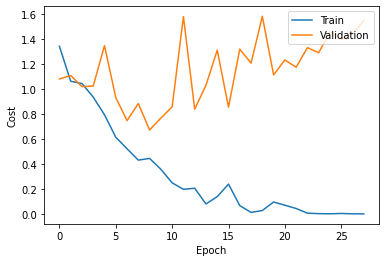

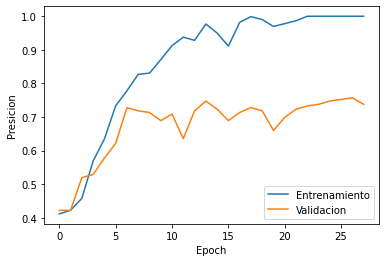

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Presicion')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validacion'], loc='lower right')
plt.show()


In [ ]:
evaluations = modelo_1.evaluate(x = x_test, y =y_test_hot)

print ("Perdida = " + str(evaluations[0]))
print ("Test presicón = " + str(evaluations[1]))


11/11 [==============================] - 1s 47ms/step - loss: 1.3164 - accuracy: 0.7726
Perdida = 1.3164106607437134
Test presicón = 0.7725947499275208


In [ ]:

evaluations = modelo_1.evaluate(x = x_test[:20], y = y_test_hot[:20])

print ("Perdida = " + str(evaluations[0]))
print ("Test presición = " + str(evaluations[1]))


1/1 [==============================] - 0s 322ms/step - loss: 1.6333 - accuracy: 0.7000
Perdida = 1.63334059715271
Test presición = 0.699999988079071


In [ ]:
# Predecir la imagen asociada a cada muestra en el conjunto de prueba (X_test)
predictions = modelo_1.predict(x_test)

In [ ]:
index = 100
# Predicción de la imagen asociada a la muestra
# np.argmax devuelve el índice del valor máximo

prediction = np.argmax(predictions[index])

print('indice de imagen del test:', index, 'la prediccion es:', dic[prediction])

indice de imagen del test: 100 la prediccion es: mammillaria_bocasana


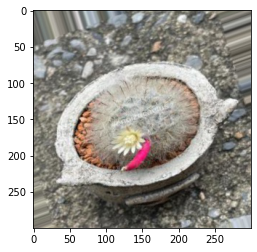

indice del diccionario: 1 Corresponde a: mammillaria_bocasana


In [ ]:
plt.imshow(x_test[index])
plt.show()
print('indice del diccionario:', y_test[index],'Corresponde a:',dic[y_test[index]] )